In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.impute import SimpleImputer

from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('Data.csv')

In [3]:
df.head().T

,0,1,2,3,4
applicant_id,5000,5001,5002,5003,5004
years_of_insurance_with_us,3,0,1,7,3
regular_checkup_lasy_year,1,0,0,4,1
adventure_sports,1,0,0,0,0
Occupation,Salried,Student,Business,Business,Student
visited_doctor_last_1_year,2,4,4,2,2
cholesterol_level,125 to 150,150 to 175,200 to 225,175 to 200,150 to 175
daily_avg_steps,4866,6411,4509,6214,4938
age,28,50,68,51,44
heart_decs_history,1,0,0,0,0


In [4]:
df.shape

(25000, 24)

In [5]:
df.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports', 'Occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'Gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'Year_last_admitted',
       'Location', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

### Variable Identification and Typecasting

In [7]:
#lets check the data types of the variable
df.dtypes

applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                    

In [8]:
# Identifying variables with integer datatype
df.dtypes[df.dtypes == 'int64']

applicant_id                      int64
years_of_insurance_with_us        int64
regular_checkup_lasy_year         int64
adventure_sports                  int64
visited_doctor_last_1_year        int64
daily_avg_steps                   int64
age                               int64
heart_decs_history                int64
other_major_decs_history          int64
avg_glucose_level                 int64
weight                            int64
weight_change_in_last_one_year    int64
fat_percentage                    int64
insurance_cost                    int64
dtype: object

In [9]:
# converting variables to category
df['years_of_insurance_with_us'] = df['years_of_insurance_with_us'].astype('category')
df['regular_checkup_lasy_year'] = df['regular_checkup_lasy_year'].astype('category')
df['adventure_sports'] = df['adventure_sports'].astype('category')
df['visited_doctor_last_1_year'] = df['visited_doctor_last_1_year'].astype('category')
df['heart_decs_history'] = df['heart_decs_history'].astype('category')
df['other_major_decs_history'] = df['other_major_decs_history'].astype('category')
df['weight_change_in_last_one_year'] = df['weight_change_in_last_one_year'].astype('category')


In [10]:
df.dtypes[df.dtypes == 'object']

Occupation                      object
cholesterol_level               object
Gender                          object
smoking_status                  object
Location                        object
covered_by_any_other_company    object
Alcohol                         object
exercise                        object
dtype: object

In [11]:
df.dtypes

applicant_id                         int64
years_of_insurance_with_us        category
regular_checkup_lasy_year         category
adventure_sports                  category
Occupation                          object
visited_doctor_last_1_year        category
cholesterol_level                   object
daily_avg_steps                      int64
age                                  int64
heart_decs_history                category
other_major_decs_history          category
Gender                              object
avg_glucose_level                    int64
bmi                                float64
smoking_status                      object
Year_last_admitted                 float64
Location                            object
weight                               int64
covered_by_any_other_company        object
Alcohol                             object
exercise                            object
weight_change_in_last_one_year    category
fat_percentage                       int64
insurance_c

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0
bmi,24010.0,31.393328,7.876535,12.3,26.10,30.5,35.60,100.6
Year_last_admitted,13119.0,2003.892217,7.581521,1990.0,1997.00,2004.0,2010.00,2018.0
weight,25000.0,71.610480,9.325183,52.0,64.00,72.0,78.00,96.0
fat_percentage,25000.0,28.812280,8.632382,11.0,21.00,31.0,36.00,42.0
insurance_cost,25000.0,27147.407680,14323.691832,2468.0,16042.00,27148.0,37020.00,67870.0


### Check for duplicate values 

In [13]:
print("Number of duplicate values in the dataset",df.duplicated().sum())

Number of duplicate values in the dataset 0


#### We will also drop the applicant_id column as it has unique value and does not contribute to our analysis

In [14]:
df.drop(['applicant_id'],inplace=True, axis=1)

In [15]:
df.shape
print('Number of rows in the dataset', df.shape[0])
print('Number of columns in the dataset', df.shape[1])

Number of rows in the dataset 25000
Number of columns in the dataset 23


### Univariate analysis

### Univariate Analysis - Categorical Variable

In [16]:
for column in df.columns:
    if pd.api.types.is_categorical_dtype(df[column]):
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

YEARS_OF_INSURANCE_WITH_US :  9
2    1808
6    2804
4    2846
1    2856
7    2873
0    2912
5    2941
8    2970
3    2990
Name: years_of_insurance_with_us, dtype: int64


REGULAR_CHECKUP_LASY_YEAR :  6
5      348
4      777
3     1818
2     2198
1     4644
0    15215
Name: regular_checkup_lasy_year, dtype: int64


ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


VISITED_DOCTOR_LAST_1_YEAR :  12
0        1
12       1
10       6
9       13
8       76
7      189
1      432
6      546
5     1265
4     6708
3     7094
2     8669
Name: visited_doctor_last_1_year, dtype: int64


HEART_DECS_HISTORY :  2
1     1366
0    23634
Name: heart_decs_history, dtype: int64


OTHER_MAJOR_DECS_HISTORY :  2
1     2454
0    22546
Name: other_major_decs_history, dtype: int64


WEIGHT_CHANGE_IN_LAST_ONE_YEAR :  7
6     908
5    2036
1    3925
0    4012
2    4037
3    5006
4    5076
Name: weight_change_in_last_one_year, dtype: int64




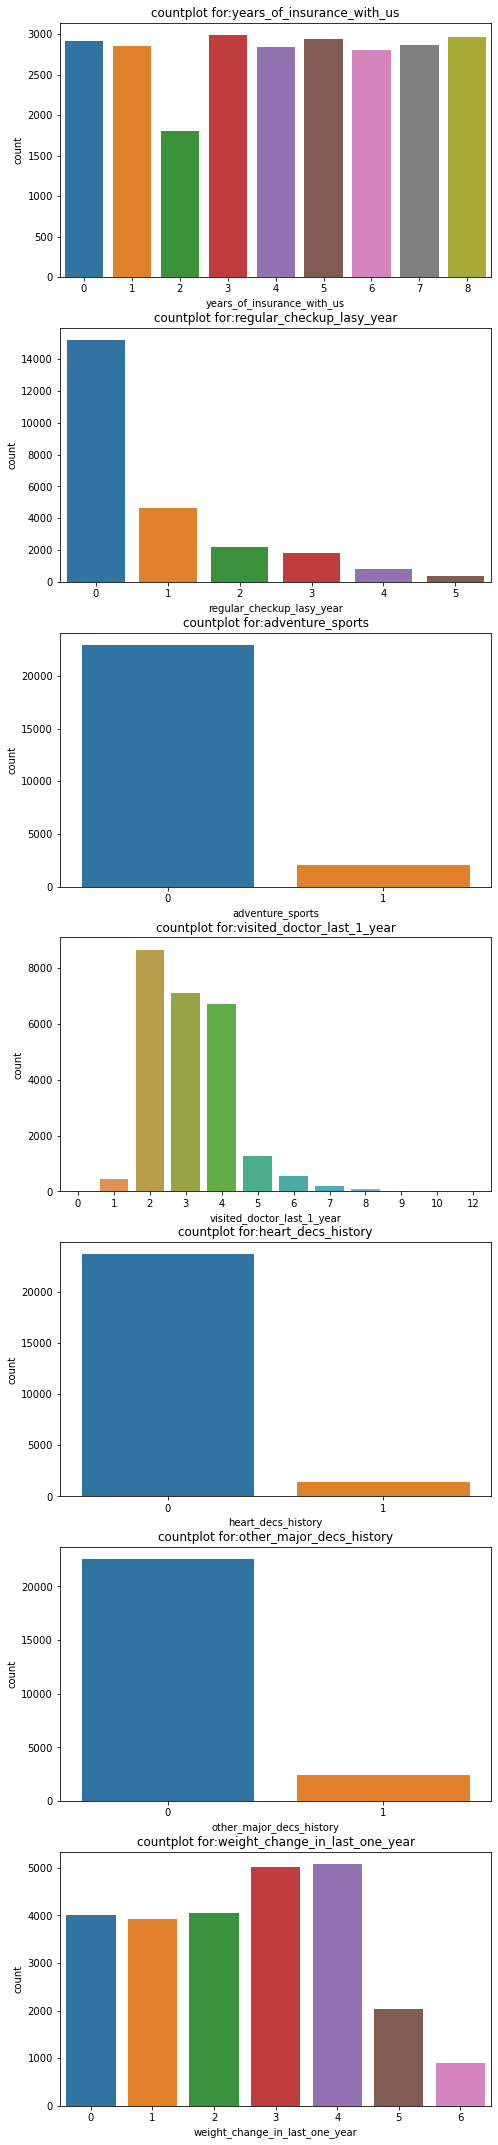

In [17]:
a=1
plt.figure(figsize=(17,100))
for i in df.columns:
    if pd.api.types.is_categorical_dtype(df[i]):
        plt.subplot(18,2,a)
        sns.countplot(df[i])
        plt.title("countplot for:" + i)
#         plt.xticks(rotation=45)
        a+=2

In [18]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

OCCUPATION :  3
Salried      4811
Business    10020
Student     10169
Name: Occupation, dtype: int64


CHOLESTEROL_LEVEL :  5
225 to 250    2054
175 to 200    2881
200 to 225    2963
125 to 150    8339
150 to 175    8763
Name: cholesterol_level, dtype: int64


GENDER :  2
Female     8578
Male      16422
Name: Gender, dtype: int64


SMOKING_STATUS :  4
smokes             3867
formerly smoked    4329
Unknown            7555
never smoked       9249
Name: smoking_status, dtype: int64


LOCATION :  15
Surat          1589
Kolkata        1620
Pune           1622
Lucknow        1637
Mumbai         1658
Nagpur         1663
Kanpur         1664
Chennai        1669
Guwahati       1672
Ahmedabad      1677
Delhi          1680
Mangalore      1697
Bhubaneswar    1704
Jaipur         1706
Bangalore      1742
Name: Location, dtype: int64


COVERED_BY_ANY_OTHER_COMPANY :  2
Y     7582
N    17418
Name: covered_by_any_other_company, dtype: int64


ALCOHOL :  3
Daily     2707
No        8541
Rare     13752
Na

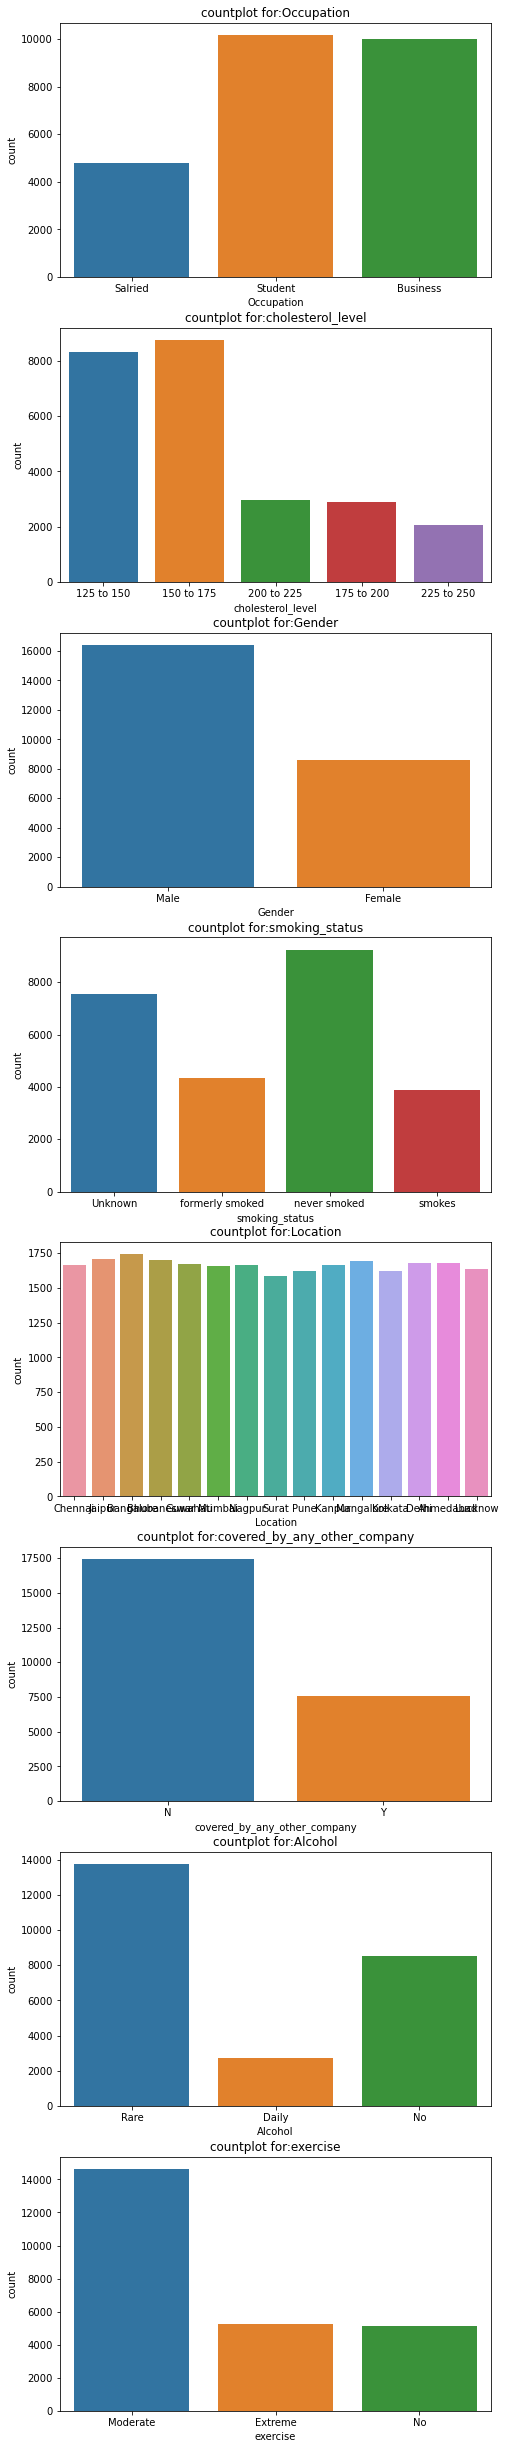

In [19]:
a=1
plt.figure(figsize=(17,100))
for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(18,2,a)
        sns.countplot(df[i])
        plt.title("countplot for:" + i)
#         plt.xticks(rotation=45)
        a+=2

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   years_of_insurance_with_us      25000 non-null  category
 1   regular_checkup_lasy_year       25000 non-null  category
 2   adventure_sports                25000 non-null  category
 3   Occupation                      25000 non-null  object  
 4   visited_doctor_last_1_year      25000 non-null  category
 5   cholesterol_level               25000 non-null  object  
 6   daily_avg_steps                 25000 non-null  int64   
 7   age                             25000 non-null  int64   
 8   heart_decs_history              25000 non-null  category
 9   other_major_decs_history        25000 non-null  category
 10  Gender                          25000 non-null  object  
 11  avg_glucose_level               25000 non-null  int64   
 12  bmi               

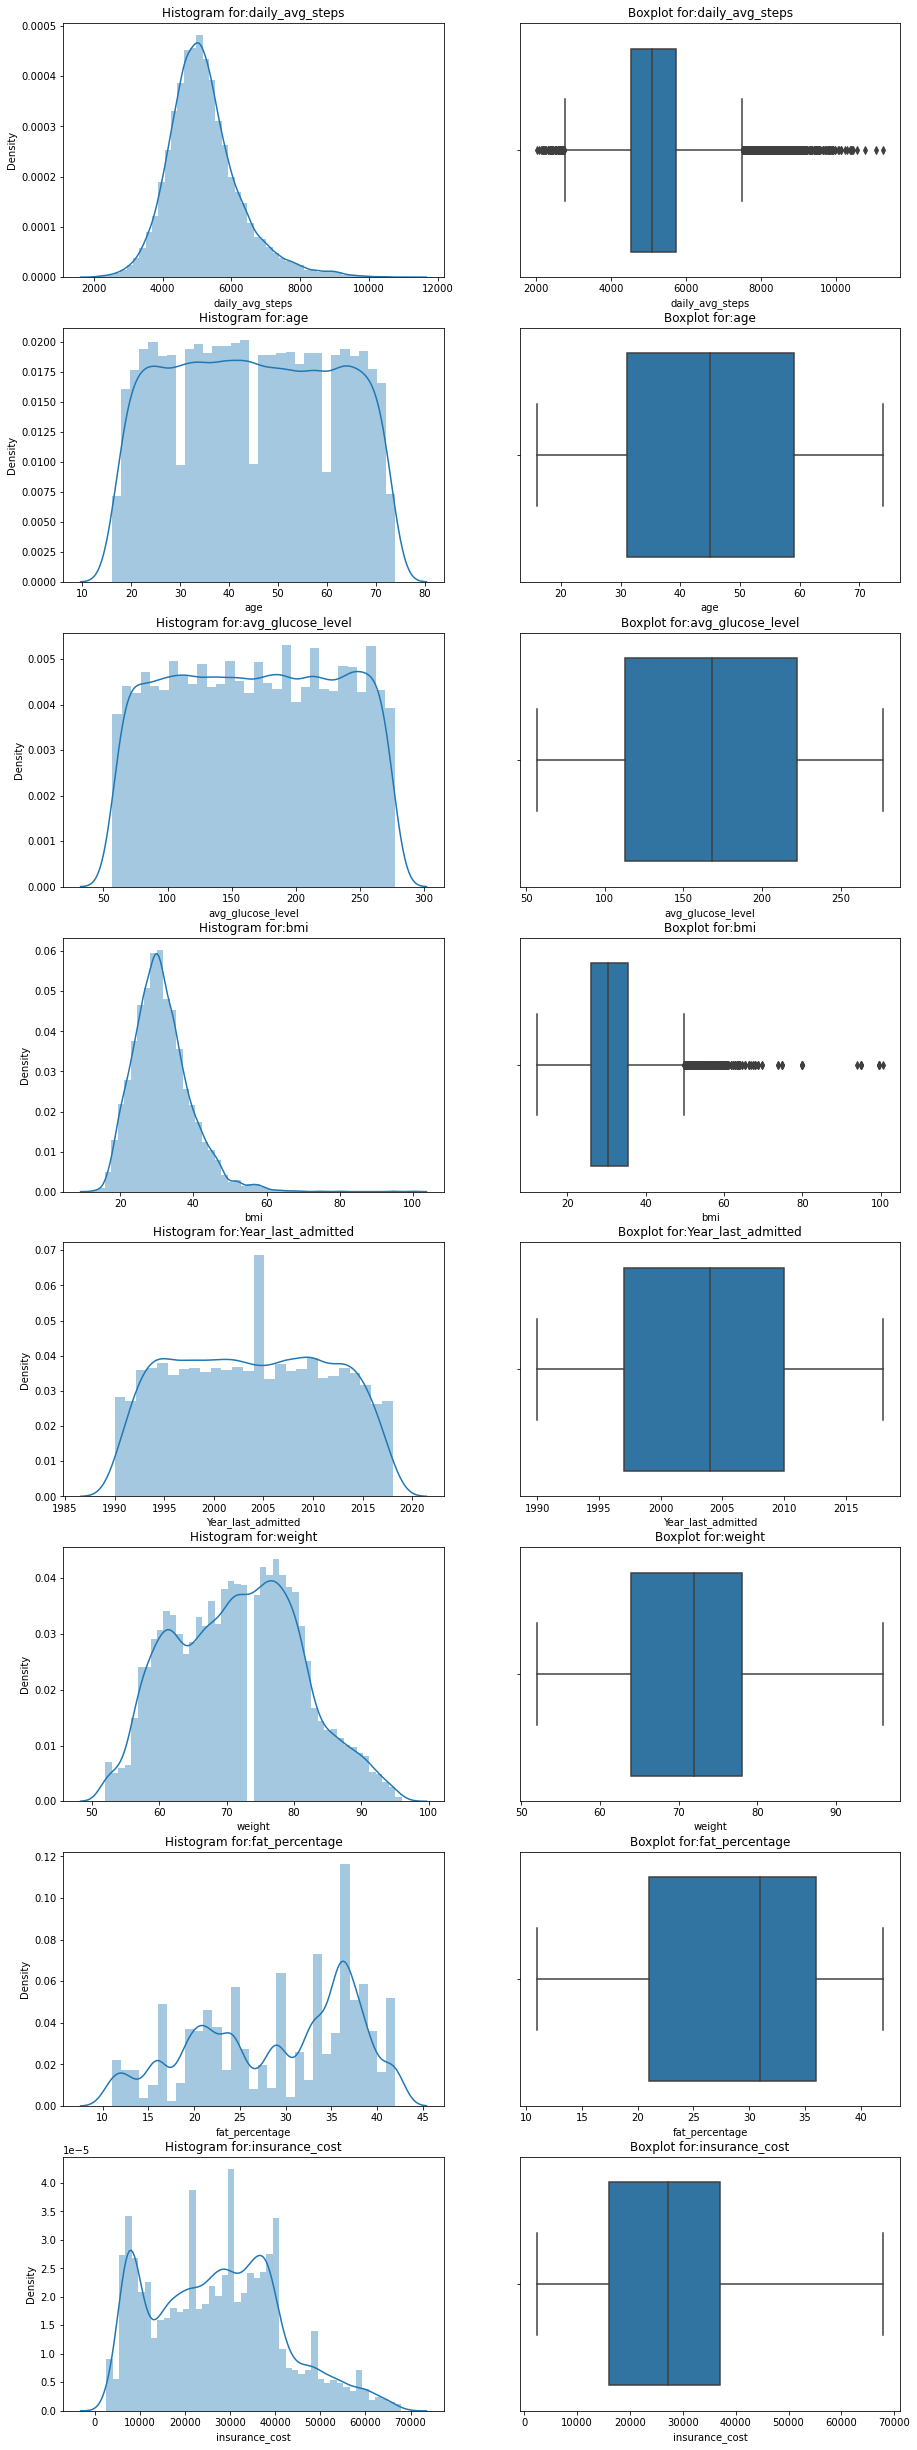

In [21]:
a=1
plt.figure(figsize=(15,100))
for i in df.columns:
    if df[i].dtype== 'float64'or df[i].dtype== 'int64':
        plt.subplot(18,2,a)
        sns.distplot(df[i])
        plt.title("Histogram for:" + i)
        plt.subplot(18,2,a+1)
        sns.boxplot(df[i])
        plt.title("Boxplot for:" + i)
        a+=2

In [22]:
# Let's check the skewness values quantitatively
df.skew().sort_values(ascending=False)

bmi                   1.056428
daily_avg_steps       0.908867
insurance_cost        0.331650
weight                0.109077
age                   0.013860
Year_last_admitted    0.013532
avg_glucose_level    -0.006389
fat_percentage       -0.363262
dtype: float64

After looking at the boxplots it can be estimated that all the variables contain outliers which needs to be treated before we proceed with the linear regression model.Also, after looking at the histograms it can be clearly estimated that:


In [23]:
df.kurtosis().sort_values(ascending=False)

bmi                   3.368286
daily_avg_steps       1.854386
insurance_cost       -0.502055
weight               -0.638038
fat_percentage       -1.057342
Year_last_admitted   -1.151287
age                  -1.176534
avg_glucose_level    -1.199167
dtype: float64

### Bivariate Analysis with Target variable

### Bivariate analysis of Dependent variable – Independent categorical variable

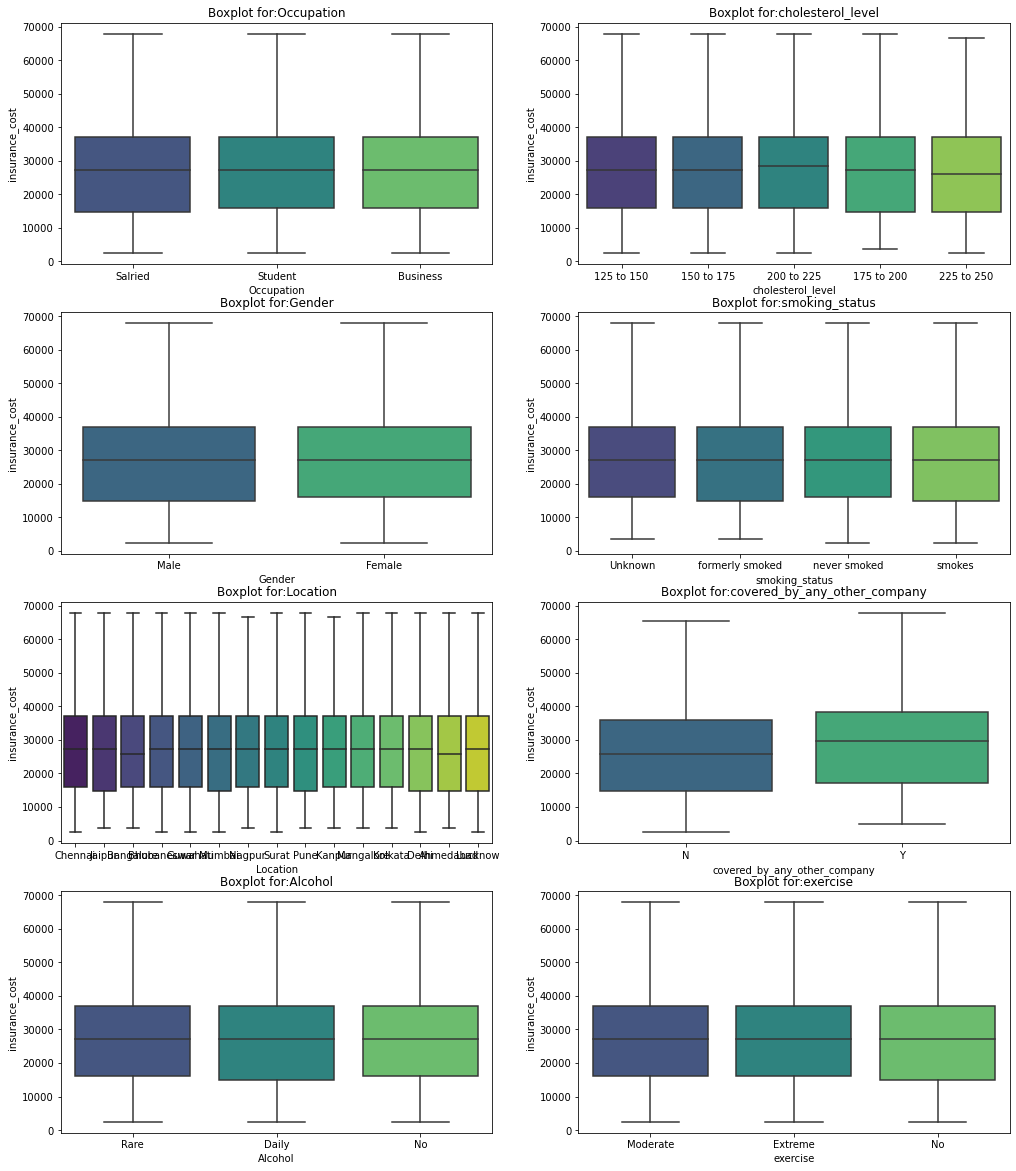

In [24]:
a=1
plt.figure(figsize=(17,95))
for i in df.columns:
    if df[i].dtype == 'object':
        plt.subplot(18,2,a)
        sns.boxplot(y='insurance_cost',x=df[i],data=df, palette="viridis")
        plt.title("Boxplot for:" + i)
        a+=1

### Bivariate analysis of Dependent variable – Independent continuous variable

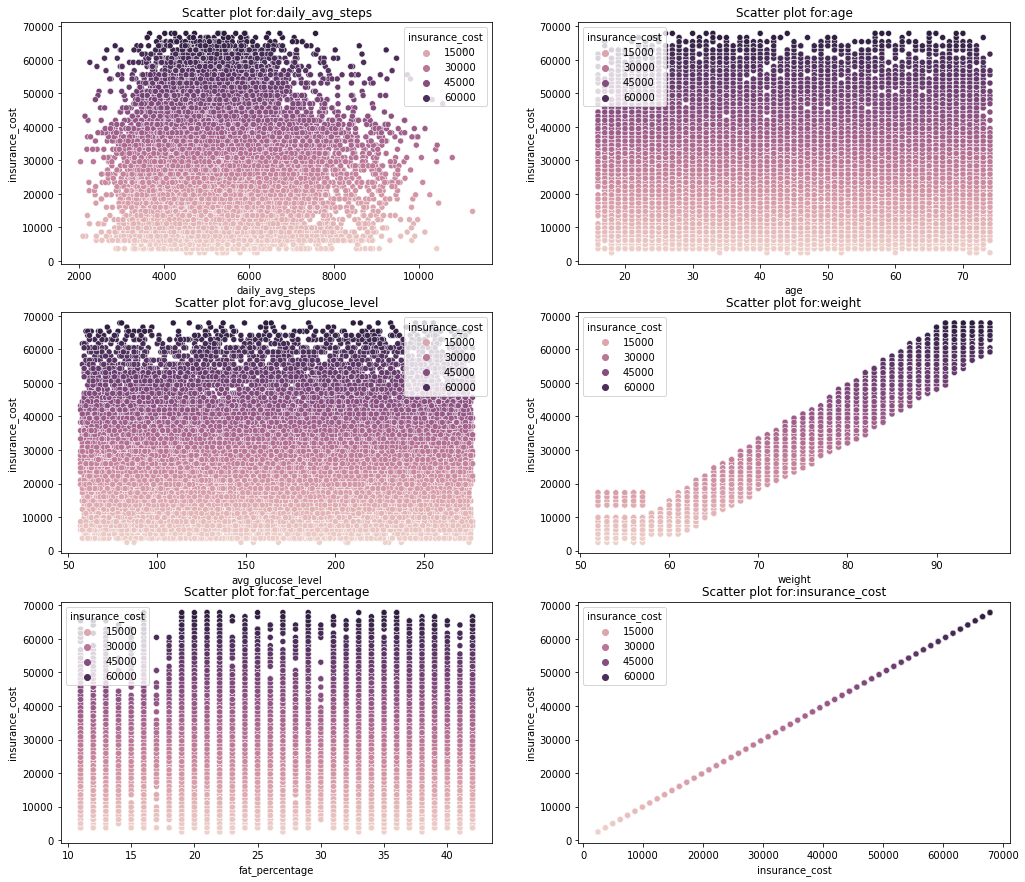

In [25]:
a=1
plt.figure(figsize=(17,95))
for i in df.columns:
    if df[i].dtype == 'int64':
        plt.subplot(18,2,a)
        sns.scatterplot(y='insurance_cost',x=df[i],data=df, hue="insurance_cost")
        plt.title("Scatter plot for:" + i)
        a+=1

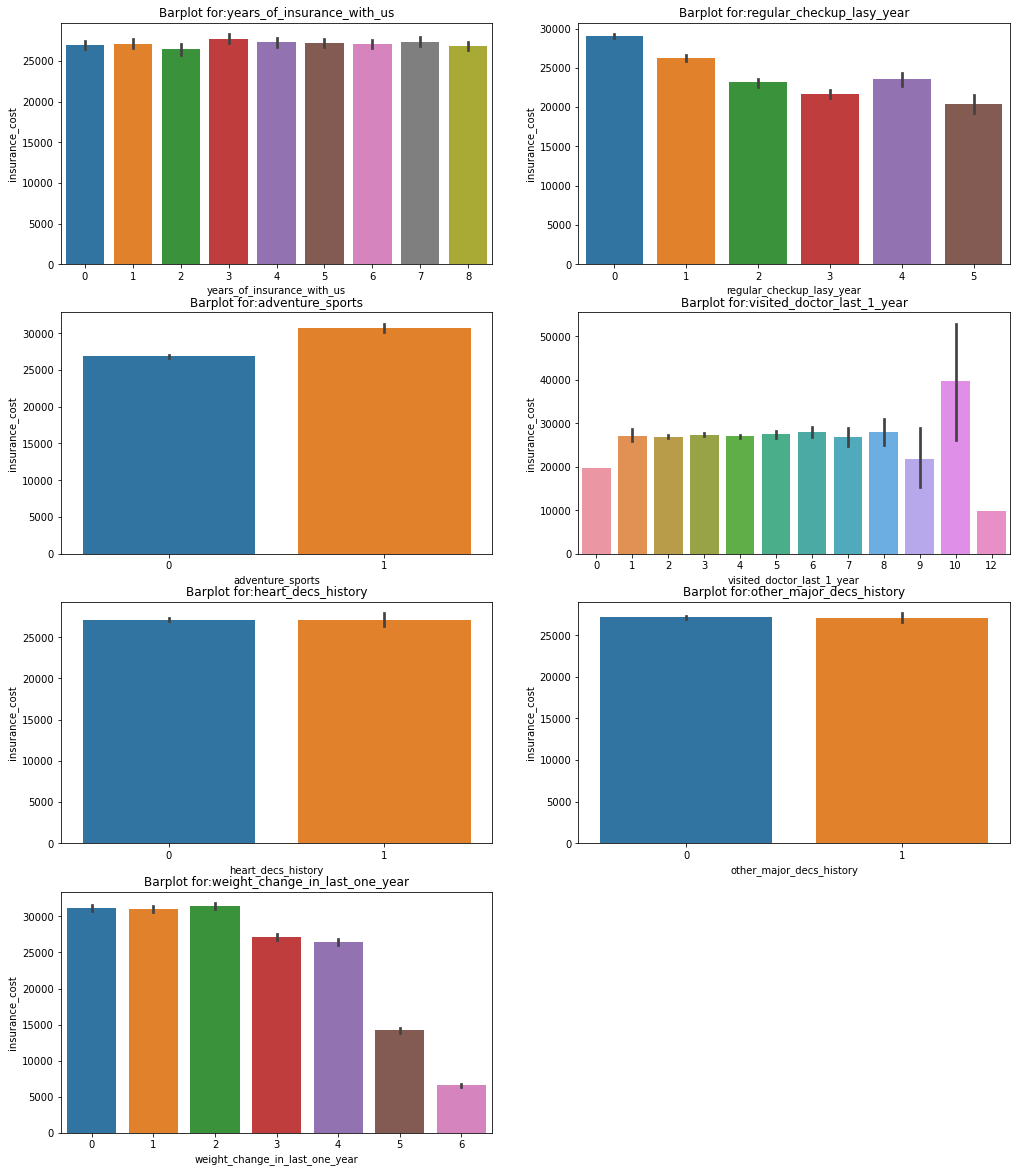

In [26]:
a=1
plt.figure(figsize=(17,95))
for i in df.columns:
    if pd.api.types.is_categorical_dtype(df[i]):
        plt.subplot(18,2,a)
        sns.barplot(y='insurance_cost',x=df[i],data=df)
        plt.title("Barplot for:" + i)
        a+=1

In [27]:
df.corr()

,daily_avg_steps,age,avg_glucose_level,bmi,Year_last_admitted,weight,fat_percentage,insurance_cost
daily_avg_steps,1.000000,-0.000313,0.000482,-0.005696,0.007038,-0.005768,0.045827,-0.006565
age,-0.000313,1.000000,-0.011551,-0.015071,-0.011042,0.001676,-0.007946,0.005195
avg_glucose_level,0.000482,-0.011551,1.000000,-0.019289,0.008866,-0.004684,-0.000498,-0.005007
bmi,-0.005696,-0.015071,-0.019289,1.000000,0.004876,-0.007804,-0.003176,-0.008231
Year_last_admitted,0.007038,-0.011042,0.008866,0.004876,1.000000,-0.840178,0.004567,-0.824137
weight,-0.005768,0.001676,-0.004684,-0.007804,-0.840178,1.000000,-0.007377,0.970357
fat_percentage,0.045827,-0.007946,-0.000498,-0.003176,0.004567,-0.007377,1.000000,-0.008486
insurance_cost,-0.006565,0.005195,-0.005007,-0.008231,-0.824137,0.970357,-0.008486,1.000000


<AxesSubplot:>

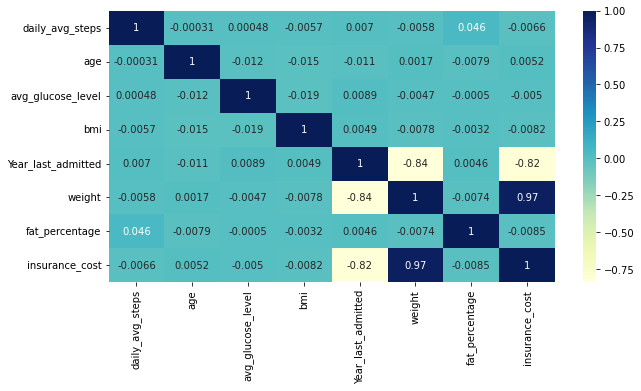

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)

### Multivariate Analysis

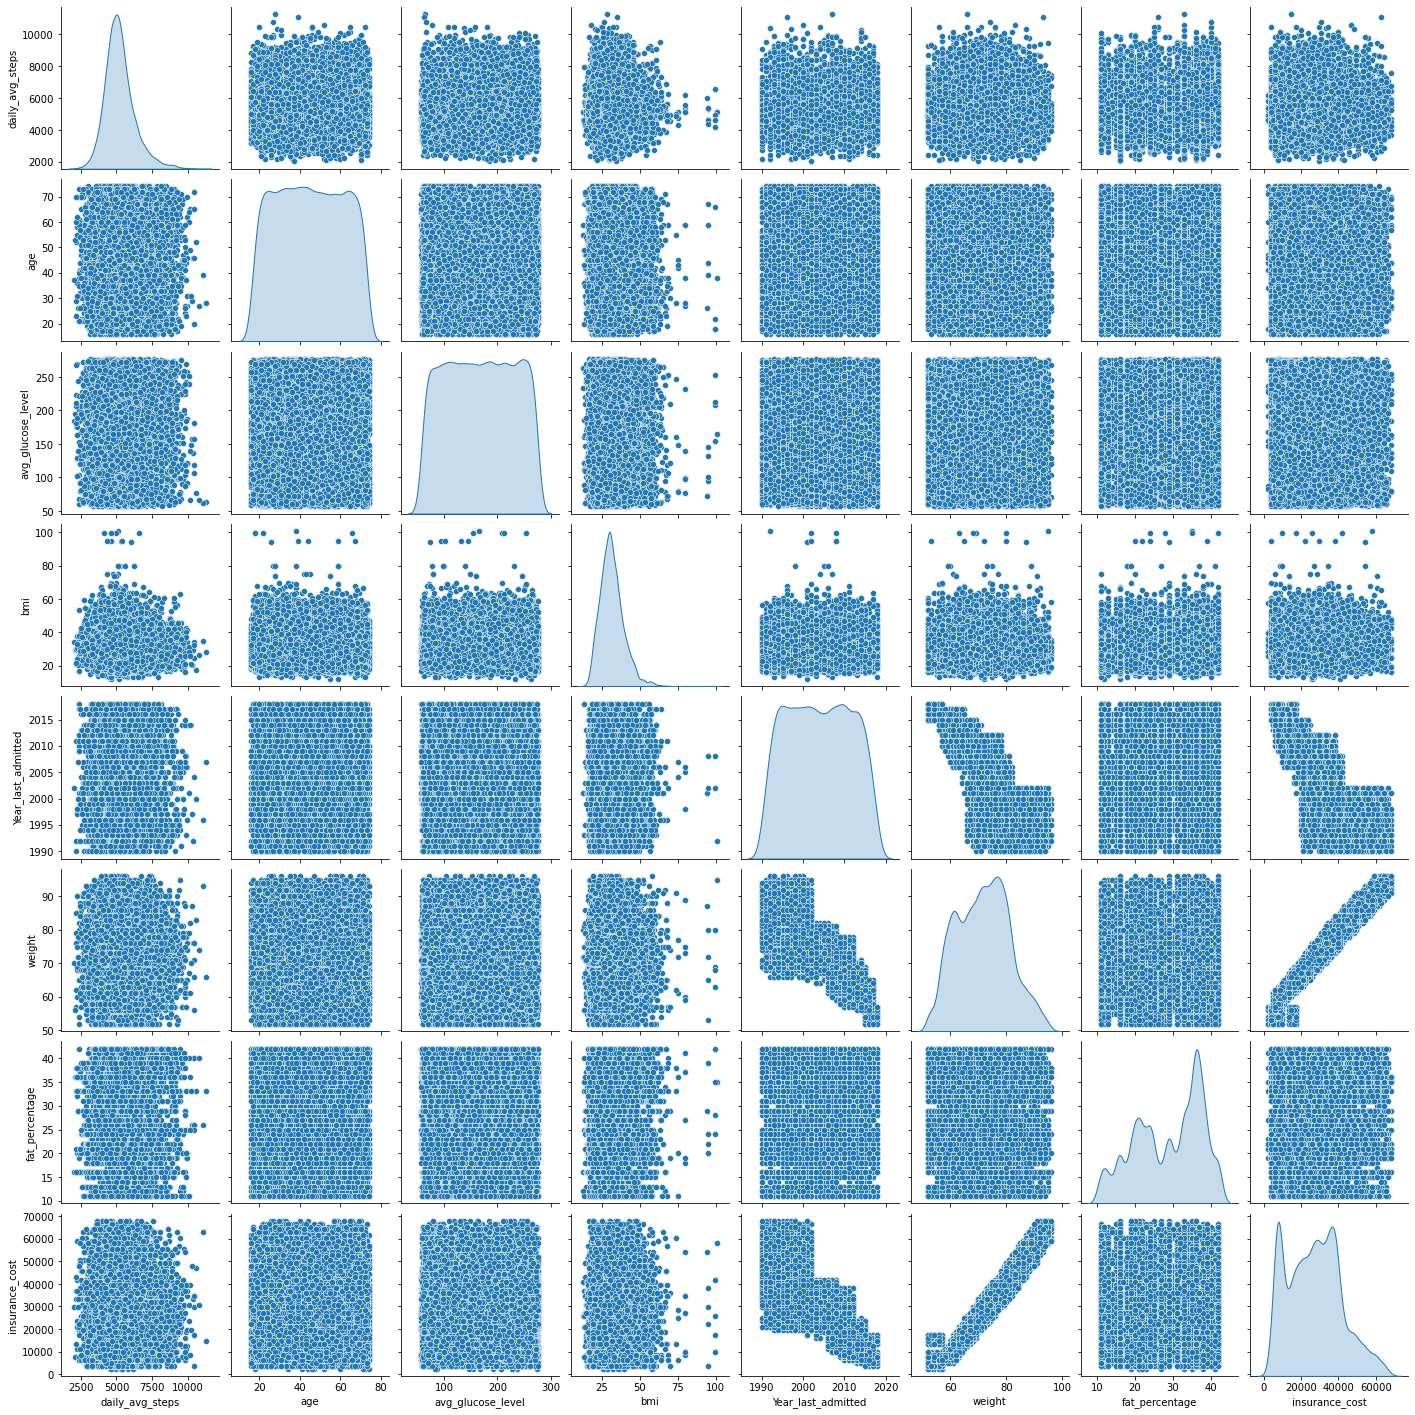

In [29]:
# Pairplot using sns
sns.pairplot(df,diag_kind='kde');

### Check  missing values

In [30]:
df.isnull().sum()

years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

### Let's Calculate the percentage of missing value

In [31]:
(df.isnull().sum()/(len(df)))*100

years_of_insurance_with_us         0.000
regular_checkup_lasy_year          0.000
adventure_sports                   0.000
Occupation                         0.000
visited_doctor_last_1_year         0.000
cholesterol_level                  0.000
daily_avg_steps                    0.000
age                                0.000
heart_decs_history                 0.000
other_major_decs_history           0.000
Gender                             0.000
avg_glucose_level                  0.000
bmi                                3.960
smoking_status                     0.000
Year_last_admitted                47.524
Location                           0.000
weight                             0.000
covered_by_any_other_company       0.000
Alcohol                            0.000
exercise                           0.000
weight_change_in_last_one_year     0.000
fat_percentage                     0.000
insurance_cost                     0.000
dtype: float64

#### We will drop the Year_last_admitted column as more than 15 % of the data is missing

In [32]:
df.drop(['Year_last_admitted'],inplace=True, axis=1)

In [33]:
df.shape
print('Number of rows in the dataset', df.shape[0])
print('Number of columns in the dataset', df.shape[1])

Number of rows in the dataset 25000
Number of columns in the dataset 22


### Imputing missing value

Since the variables have outliers, median is the best measure of central tendency to fill in missing values
Accordingly, the missing values have been treated using the SimpleImputer with  strategy ‘median’.

In [34]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(df[['bmi']])
df['bmi'] = imputer.transform(df[['bmi']])
df.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

### Check outliers

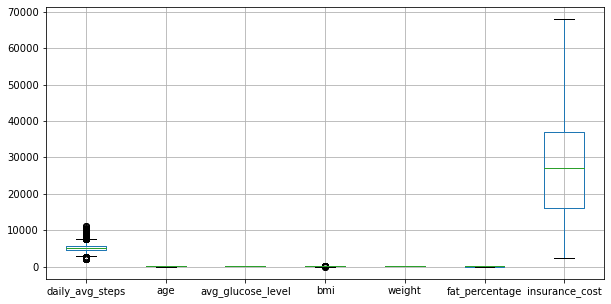

In [35]:
df.boxplot(figsize=(10,5))
# plt.xticks(rotation=90)
plt.show()

In [36]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [37]:
for column in df.columns:
    if df[column].dtype == 'int64'or df[column].dtype == 'float64':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

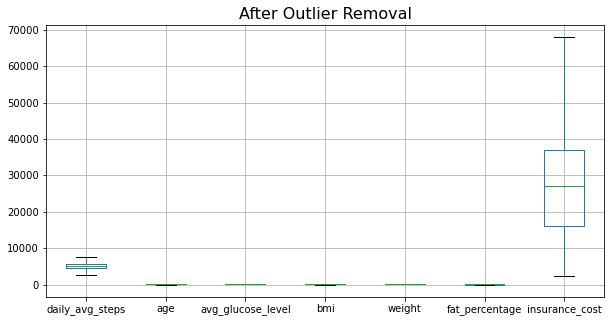

In [38]:
df.boxplot(figsize=(10,5))
# plt.xticks(rotation=90)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
daily_avg_steps,25000.0,5189.02272,969.591482,2762.5,4543.0,5089.0,5730.0,7510.5
age,25000.0,44.91832,16.107492,16.0,31.0,45.0,59.0,74.0
avg_glucose_level,25000.0,167.53000,62.729712,57.0,113.0,168.0,222.0,277.0
bmi,25000.0,31.18408,7.135348,12.8,26.3,30.5,35.3,48.8
weight,25000.0,71.61048,9.325183,52.0,64.0,72.0,78.0,96.0
fat_percentage,25000.0,28.81228,8.632382,11.0,21.0,31.0,36.0,42.0
insurance_cost,25000.0,27147.40768,14323.691832,2468.0,16042.0,27148.0,37020.0,67870.0


### Encoding

In [40]:
df['cholesterol_level'].unique()

array(['125 to 150', '150 to 175', '200 to 225', '175 to 200',
       '225 to 250'], dtype=object)

In [41]:
df['cholesterol_level']=np.where(df['cholesterol_level'] =='125 to 150', 'Normal', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='150 to 175', 'Normal', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='175 to 200', 'Normal', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='200 to 225', 'Medium', df['cholesterol_level'])
df['cholesterol_level']=np.where(df['cholesterol_level'] =='225 to 250', 'High', df['cholesterol_level'])

In [42]:
df['cholesterol_level'].unique()

array(['Normal', 'Medium', 'High'], dtype=object)

In [43]:
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,Normal,4866.0,28.0,1,0,...,31.2,Unknown,Chennai,67.0,N,Rare,Moderate,1,25.0,20978.0
1,0,0,0,Student,4,Normal,6411.0,50.0,0,0,...,34.2,formerly smoked,Jaipur,58.0,N,Rare,Moderate,3,27.0,6170.0
2,1,0,0,Business,4,Medium,4509.0,68.0,0,0,...,40.4,formerly smoked,Jaipur,73.0,N,Daily,Extreme,0,32.0,28382.0
3,7,4,0,Business,2,Normal,6214.0,51.0,0,0,...,22.9,Unknown,Chennai,71.0,Y,Rare,No,3,37.0,27148.0
4,3,1,0,Student,2,Normal,4938.0,44.0,0,1,...,26.5,never smoked,Bangalore,74.0,N,No,Extreme,0,34.0,29616.0


In [44]:
onehotcols=['Occupation','cholesterol_level','Gender','smoking_status','Location','covered_by_any_other_company','Alcohol','exercise']

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
enc=OneHotEncoder(sparse=False)

setting the sparse= false will return an array instead of sparse matrix so need to convert it later

In [47]:
#One-hot-encode the categorical columns.
#Convert it to df
enc_df=pd.DataFrame(enc.fit_transform(df[onehotcols]))
enc_df.columns=enc.get_feature_names_out(input_features=onehotcols)

In [48]:
data_other_cols = df.drop(columns=onehotcols)

In [49]:
df_New = pd.concat([enc_df, data_other_cols], axis=1)

In [50]:
df_New.head().T

,0,1,2,3,4
Occupation_Business,0.0,0.0,1.0,1.0,0.0
Occupation_Salried,1.0,0.0,0.0,0.0,0.0
Occupation_Student,0.0,1.0,0.0,0.0,1.0
cholesterol_level_High,0.0,0.0,0.0,0.0,0.0
cholesterol_level_Medium,0.0,0.0,1.0,0.0,0.0
cholesterol_level_Normal,1.0,1.0,0.0,1.0,1.0
Gender_Female,0.0,0.0,1.0,1.0,0.0
Gender_Male,1.0,1.0,0.0,0.0,1.0
smoking_status_Unknown,1.0,0.0,0.0,1.0,0.0
smoking_status_formerly smoked,0.0,1.0,1.0,0.0,0.0


In [51]:
df_New.rename(columns={'smoking_status_never smoked':'smoking_status_never_smoked','smoking_status_formerly smoked':'smoking_status_formerly_smoked'}, inplace=True)

In [52]:
# lets convert the data type of category into float64
df_New['years_of_insurance_with_us'] = df_New['years_of_insurance_with_us'].astype('float64')
df_New['regular_checkup_lasy_year'] = df_New['regular_checkup_lasy_year'].astype('float64')
df_New['adventure_sports'] = df_New['adventure_sports'].astype('float64')
df_New['visited_doctor_last_1_year'] = df_New['visited_doctor_last_1_year'].astype('float64')
df_New['heart_decs_history'] = df_New['heart_decs_history'].astype('float64')
df_New['other_major_decs_history'] = df_New['other_major_decs_history'].astype('float64')
df_New['weight_change_in_last_one_year'] = df_New['weight_change_in_last_one_year'].astype('float64')

In [53]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Occupation_Business             25000 non-null  float64
 1   Occupation_Salried              25000 non-null  float64
 2   Occupation_Student              25000 non-null  float64
 3   cholesterol_level_High          25000 non-null  float64
 4   cholesterol_level_Medium        25000 non-null  float64
 5   cholesterol_level_Normal        25000 non-null  float64
 6   Gender_Female                   25000 non-null  float64
 7   Gender_Male                     25000 non-null  float64
 8   smoking_status_Unknown          25000 non-null  float64
 9   smoking_status_formerly_smoked  25000 non-null  float64
 10  smoking_status_never_smoked     25000 non-null  float64
 11  smoking_status_smokes           25000 non-null  float64
 12  Location_Ahmedabad              

In [54]:
df_New.shape
print('Number of rows in the dataset', df_New.shape[0])
print('Number of columns in the dataset', df_New.shape[1])

Number of rows in the dataset 25000
Number of columns in the dataset 49


### Scaling the data

In [55]:
df_clust=df_New.copy()

In [56]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [57]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [58]:
scaled_df = pd.DataFrame(X.fit_transform(df_clust))

In [59]:
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,-0.817858,2.048518,-0.828045,-0.29919,-0.366682,0.501062,-0.722737,0.722737,1.519561,-0.457628,...,-0.333160,-1.050360,4.159520,-0.329915,-1.124370,0.002231,-0.494422,-0.898041,-0.441634,-0.430722
1,-0.817858,-0.488158,1.207664,-0.29919,-0.366682,0.501062,-0.722737,0.722737,-0.658085,2.185179,...,1.260326,0.315492,-0.240412,-0.329915,0.708929,0.422682,-1.459569,0.285180,-0.209944,-1.464554
2,1.222706,-0.488158,-0.828045,-0.29919,2.727159,-1.995760,1.383630,-1.383630,-0.658085,2.185179,...,-0.701364,1.433007,-0.240412,-0.329915,-0.024391,1.291613,0.149010,-1.489652,0.369282,0.086194
3,1.222706,-0.488158,-0.828045,-0.29919,-0.366682,0.501062,1.383630,-1.383630,1.519561,-0.457628,...,1.057144,0.377576,-0.240412,-0.329915,-0.933069,-1.161015,-0.065467,0.285180,0.948508,0.000041
4,-0.817858,-0.488158,1.207664,-0.29919,-0.366682,0.501062,-0.722737,0.722737,-0.658085,-0.457628,...,-0.258901,-0.057013,-0.240412,3.031081,-0.789594,-0.656474,0.256249,-1.489652,0.600972,0.172347


### Creating Clusters using KMeans
Forming 2 Clusters with K=2

In [60]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [61]:
# Fit K means on the scaled_df
k_means.fit(scaled_df)

KMeans(n_clusters=2, random_state=1)

#### Cluster Output for all the observations

In [62]:
# Get the labels
k_means.labels_

array([1, 1, 0, ..., 1, 1, 1])

In [63]:
k_means.inertia_

1166775.019529442

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [64]:
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

wss

[1224999.9999999972,
 1166775.019529442,
 1123757.7994369701,
 1088406.8855780873,
 1054891.342414549,
 1038269.368524502,
 1021879.7631835993,
 1005358.7143794261,
 988685.4542617433,
 971901.5222485301]

<AxesSubplot:>

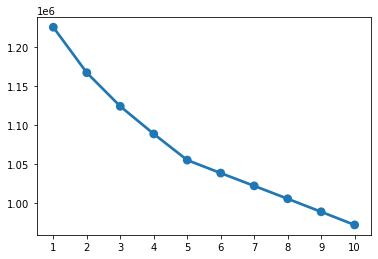

In [65]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a, wss)

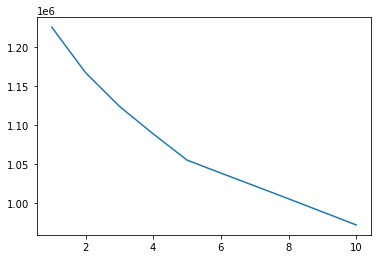

In [66]:
plt.plot(range(1,11), wss)

In [67]:
# Kmeans with k=3
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
labels_3 = k_means.labels_

In [68]:
# Cluster evaluation for 3 clusters: the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
# Calculating silhouette_score
silhouette_score(scaled_df,labels_3,random_state=1)

0.04526932602239164

In [69]:
# Kmeans with k=4
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_df)
labels_4 = k_means.labels_

In [70]:
silhouette_score(scaled_df,labels_4,random_state=1)

0.055305118094284116

silhouette score is better for 4 clusters than for 3 clusters. So, final clusters will be 4

Appending Clusters to the original dataset

In [71]:
df_clust["Clus_kmeans3"] = labels_3
df_clust.head()

,Occupation_Business,Occupation_Salried,Occupation_Student,cholesterol_level_High,cholesterol_level_Medium,cholesterol_level_Normal,Gender_Female,Gender_Male,smoking_status_Unknown,smoking_status_formerly_smoked,...,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,Clus_kmeans3
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,28.0,1.0,0.0,97.0,31.2,67.0,1.0,25.0,20978.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,50.0,0.0,0.0,212.0,34.2,58.0,3.0,27.0,6170.0,0
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,68.0,0.0,0.0,166.0,40.4,73.0,0.0,32.0,28382.0,2
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,51.0,0.0,0.0,109.0,22.9,71.0,3.0,37.0,27148.0,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,44.0,0.0,1.0,118.0,26.5,74.0,0.0,34.0,29616.0,0


### Cluster Profiling

In [72]:
df_clust.Clus_kmeans3.value_counts().sort_index()

0    13165
1     6818
2     5017
Name: Clus_kmeans3, dtype: int64

In [73]:
clust_profile=df_clust.groupby('Clus_kmeans3').mean()
clust_profile['freq']=df_clust.Clus_kmeans3.value_counts().sort_index()
clust_profile.T

Clus_kmeans3,0,1,2
Occupation_Business,0.351006,0.357290,0.590592
Occupation_Salried,0.136346,0.141097,0.409408
Occupation_Student,0.512647,0.501613,0.000000
cholesterol_level_High,0.000000,0.000000,0.409408
cholesterol_level_Medium,0.000000,0.000000,0.590592
cholesterol_level_Normal,1.000000,1.000000,0.000000
Gender_Female,0.000000,1.000000,0.350807
Gender_Male,1.000000,0.000000,0.649193
smoking_status_Unknown,0.191265,0.515547,0.303369
smoking_status_formerly_smoked,0.218914,0.083309,0.175204


### Multicollinearity Check

In [74]:
considered_features = ['years_of_insurance_with_us','regular_checkup_lasy_year','adventure_sports','visited_doctor_last_1_year','daily_avg_steps','age','heart_decs_history','other_major_decs_history','avg_glucose_level','bmi','weight','weight_change_in_last_one_year','fat_percentage']


In [75]:
def compute_vif(considered_features):
    
    X = df_New[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# compute vif 
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
10,weight,1.194094
11,weight_change_in_last_one_year,1.166229
7,other_major_decs_history,1.035191
4,daily_avg_steps,1.029855
3,visited_doctor_last_1_year,1.029714
1,regular_checkup_lasy_year,1.027115
9,bmi,1.025965
6,heart_decs_history,1.012561
2,adventure_sports,1.006780
12,fat_percentage,1.003944


### Split the data

In [76]:
# Copy all the predictor variables into X dataframe. Since 'insurance_cost' is dependent variable drop it
X = df_New.drop('insurance_cost', axis=1)

# Copy the 'insurance_cost' column alone into the y dataframe. This is the dependent variable
y = df_New[['insurance_cost']] 

In [77]:
from sklearn import preprocessing

# scale all the columns of the dataset. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)  # ideally the training and test should be 

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)

### Fit a simple linear regression

In [79]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [80]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Occupation_Business is -46651706008.20538
The coefficient for Occupation_Salried is -37527777507.57368
The coefficient for Occupation_Student is -46762971894.0592
The coefficient for cholesterol_level_High is -41804678969.4395
The coefficient for cholesterol_level_Medium is -49205453636.32519
The coefficient for cholesterol_level_Normal is -60971035814.317375
The coefficient for Gender_Female is 588897189389.2195
The coefficient for Gender_Male is 588897189389.221
The coefficient for smoking_status_Unknown is 347619092493.74084
The coefficient for smoking_status_formerly_smoked is 286434572965.1504
The coefficient for smoking_status_never_smoked is 365470523825.238
The coefficient for smoking_status_smokes is 273727583090.96475
The coefficient for Location_Ahmedabad is 687584201292.4236
The coefficient for Location_Bangalore is 699805594832.9862
The coefficient for Location_Bhubaneswar is 692695914007.4946
The coefficient for Location_Chennai is 686059838931.0664
Th

Variables showing Positive effect on regression model are Occupation,Gender,smoking_status,Alcohol,exercise,adventure_sports, age, heart_decs_history,other_major_decs_history ,avg_glucose_level, weight and weight_change_in_last_one_year – these factors highly influencing our model

The higher the value of the beta coefficient, the higher is the impact.

In [81]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for Linear regression model is {}".format(intercept))

The intercept for Linear regression model is [0.00048598]


In [82]:
from sklearn import metrics

In [83]:
y_train_predict_lr = regression_model.predict(X_train)
lr_score_train = r2_score(y_train, y_train_predict_lr)
Adj_r2_lr_train = 1 - ((1-lr_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_lr = regression_model.predict(X_test)
lr_score_test = r2_score(y_test, y_test_predict_lr)
Adj_r2_lr_test = 1 - ((1-lr_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_lr = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_lr)), '.3f'))

MAPE_lr=mean_absolute_percentage_error(y_test,y_test_predict_lr)

print('R2 score (train) : {0:.3f}'.format(lr_score_train))
print('R2 score (test) : {0:.3f}'.format(lr_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_lr_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_lr_test))
print('RMSE : {0:.3f}'.format(rmse_lr))
print('MAPE : {0:.3f}'.format(MAPE_lr))

R2 score (train) : 0.945
R2 score (test) : 0.945
Adj_R2 score (train) : 0.944
Adj_R2 score (test) : 0.945
RMSE : 0.232
MAPE : 102.498


### Linear Regression using statsmodels

In [84]:
# R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# This library expects the X and Y to be given in one single dataframe

# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Occupation_Business,Occupation_Salried,Occupation_Student,cholesterol_level_High,cholesterol_level_Medium,cholesterol_level_Normal,Gender_Female,Gender_Male,smoking_status_Unknown,smoking_status_formerly_smoked,...,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
21693,1.222706,-0.488158,-0.828045,-0.29919,2.727159,-1.995760,-0.722737,0.722737,-0.658085,2.185179,...,-0.516746,-0.367434,4.159520,-0.329915,-0.375109,-0.516324,-0.387183,0.285180,1.527734,-0.344569
18060,-0.817858,-0.488158,1.207664,-0.29919,-0.366682,0.501062,1.383630,-1.383630,1.519561,-0.457628,...,0.006165,-1.050360,-0.240412,-0.329915,0.565453,-1.497375,1.757590,-0.898041,1.180198,1.809248
5595,-0.817858,-0.488158,1.207664,-0.29919,-0.366682,0.501062,1.383630,-1.383630,1.519561,-0.457628,...,-0.194955,-0.119097,-0.240412,-0.329915,-0.375109,-1.231090,1.006919,0.285180,-0.557480,0.775416
17589,1.222706,-0.488158,-0.828045,-0.29919,-0.366682,0.501062,1.383630,-1.383630,1.519561,-0.457628,...,0.155715,-0.802023,-0.240412,-0.329915,1.059647,-1.707601,0.256249,0.285180,0.948508,0.258499
3272,1.222706,-0.488158,-0.828045,-0.29919,-0.366682,0.501062,-0.722737,0.722737,1.519561,-0.457628,...,-1.251091,0.998417,-0.240412,-0.329915,-0.008449,0.128366,1.221397,-1.489652,0.021746,1.120026


In [85]:
data_train.columns

Index(['Occupation_Business', 'Occupation_Salried', 'Occupation_Student',
       'cholesterol_level_High', 'cholesterol_level_Medium',
       'cholesterol_level_Normal', 'Gender_Female', 'Gender_Male',
       'smoking_status_Unknown', 'smoking_status_formerly_smoked',
       'smoking_status_never_smoked', 'smoking_status_smokes',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Bhubaneswar',
       'Location_Chennai', 'Location_Delhi', 'Location_Guwahati',
       'Location_Jaipur', 'Location_Kanpur', 'Location_Kolkata',
       'Location_Lucknow', 'Location_Mangalore', 'Location_Mumbai',
       'Location_Nagpur', 'Location_Pune', 'Location_Surat',
       'covered_by_any_other_company_N', 'covered_by_any_other_company_Y',
       'Alcohol_Daily', 'Alcohol_No', 'Alcohol_Rare', 'exercise_Extreme',
       'exercise_Moderate', 'exercise_No', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports',
       'visited_doctor_last_1_year', 'daily_avg_steps',

In [86]:
expr='insurance_cost ~ Occupation_Business+Occupation_Salried+Occupation_Student+cholesterol_level_High+cholesterol_level_Medium+cholesterol_level_Normal+Gender_Female+Gender_Male+smoking_status_Unknown+smoking_status_formerly_smoked+smoking_status_never_smoked+smoking_status_smokes+Location_Ahmedabad+Location_Bangalore+Location_Bhubaneswar+Location_Chennai+Location_Delhi+Location_Guwahati+Location_Jaipur+Location_Kanpur+Location_Kolkata+Location_Lucknow+Location_Mangalore+Location_Mumbai+Location_Nagpur+Location_Pune+Location_Surat+covered_by_any_other_company_N+covered_by_any_other_company_Y+Alcohol_Daily+Alcohol_No+Alcohol_Rare+exercise_Extreme+exercise_Moderate+exercise_No+years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+avg_glucose_level+bmi+weight+weight_change_in_last_one_year+fat_percentage'


In [87]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                         5.511253e-04
Occupation_Business               1.174331e+11
Occupation_Salried                9.446607e+10
Occupation_Student                1.177132e+11
cholesterol_level_High           -1.459087e+10
cholesterol_level_Medium         -1.717393e+10
cholesterol_level_Normal         -2.128041e+10
Gender_Female                    -2.395908e+10
Gender_Male                      -2.395908e+10
smoking_status_Unknown           -7.463603e+10
smoking_status_formerly_smoked   -6.149933e+10
smoking_status_never_smoked      -7.846885e+10
smoking_status_smokes            -5.877106e+10
Location_Ahmedabad               -2.955927e+10
Location_Bangalore               -3.008466e+10
Location_Bhubaneswar             -2.977902e+10
Location_Chennai                 -2.949373e+10
Location_Delhi                   -2.958379e+10
Location_Guwahati                -2.951833e+10
Location_Jaipur                  -2.979521e+10
Location_Kanpur                  -2.945268e+10
Location_Kolk

In [88]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     7970.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:31   Log-Likelihood:                 458.57
No. Observations:               18750   AIC:                            -835.1
Df Residuals:                   18709   BIC:                            -513.7
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [89]:
# predict insurance cost for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test)

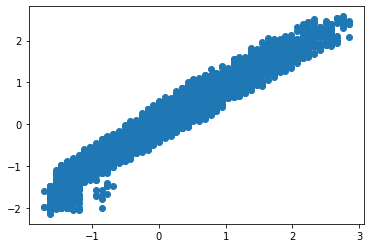

In [90]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500

plt.scatter(y_test['insurance_cost'], y_pred)

In [91]:
# How do we improve the model? the R^2 is .944, how do we improve it
# The indpendent attributes have different units and scales of measurement 
# It is always a good practice to scale all the dimensions using z scores or someother methode to address the problem of different scales 

If we look at the p-values of some of the variables, the values seem to be pretty high, which means they aren’t significant. That means we can drop those variables from the model.

Before dropping the variables, as discussed above, we have to see the multicollinearity between the variables. We do that by calculating the VIF value.

Variance Inflation Factor or VIF is a quantitative value that says how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for VIF is:

VIF = 1/(1-Ri²)

In [92]:
expr_1='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+avg_glucose_level+bmi+weight+weight_change_in_last_one_year+fat_percentage'


In [93]:
model_1 = smf.ols(formula= expr_1, data = data_train).fit()

In [94]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.392e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:34   Log-Likelihood:                 225.20
No. Observations:               18750   AIC:                            -422.4
Df Residuals:                   18736   BIC:                            -312.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.422      0.673      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.747      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.694      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.635      0.102      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.642      0.101      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.103      0.270      -0.005       0.002
age                                0.0034      0.002      1.969      0.049     1.5e-05       0.007
heart_decs_history                 0.0024      0.002      1.379      0.168      -0.001       0.006
other_major_decs_history           0.0004      0.002      0.250      0.802      -0.003       0.004
avg_glucose_level                  0.0012      0.002      0.711      0.477      -0.002       0.005
bmi                               -0.0001      0.002     -0.069      0.945      -0.004       0.003
weight                             0.9720      0.002    510.135      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.615      0.000       0.014       0.022
fat_percentage                    -0.0005      0.002     -0.287      0.774      -0.004       0.003
==============================================================================
Omnibus:                      502.190   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.368
Skew:                           0.375   Prob(JB):                    6.28e-124
Kurtosis:                       3.404   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

In [95]:
expr_2='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+avg_glucose_level+bmi+weight+weight_change_in_last_one_year'


In [96]:
model_2 = smf.ols(formula= expr_2, data = data_train).fit()
model_2.params

Intercept                         0.000735
years_of_insurance_with_us        0.008291
regular_checkup_lasy_year        -0.036543
adventure_sports                  0.002864
visited_doctor_last_1_year       -0.002906
daily_avg_steps                  -0.001985
age                               0.003443
heart_decs_history                0.002446
other_major_decs_history          0.000448
avg_glucose_level                 0.001241
bmi                              -0.000118
weight                            0.971965
weight_change_in_last_one_year    0.018140
dtype: float64

In [97]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.591e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:35   Log-Likelihood:                 225.16
No. Observations:               18750   AIC:                            -424.3
Df Residuals:                   18737   BIC:                            -322.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.421      0.674      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.748      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.694      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.633      0.102      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.633      0.102      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.116      0.265      -0.005       0.002
age                                0.0034      0.002      1.972      0.049    2.11e-05       0.007
heart_decs_history                 0.0024      0.002      1.380      0.168      -0.001       0.006
other_major_decs_history           0.0004      0.002      0.249      0.803      -0.003       0.004
avg_glucose_level                  0.0012      0.002      0.710      0.478      -0.002       0.005
bmi                               -0.0001      0.002     -0.067      0.947      -0.004       0.003
weight                             0.9720      0.002    510.150      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.612      0.000       0.014       0.022
==============================================================================
Omnibus:                      502.704   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.042
Skew:                           0.375   Prob(JB):                    4.48e-124
Kurtosis:                       3.404   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3

In [98]:
expr_3='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+avg_glucose_level+weight+weight_change_in_last_one_year'


In [99]:
model_3 = smf.ols(formula= expr_3, data = data_train).fit()
model_3.params

Intercept                         0.000735
years_of_insurance_with_us        0.008293
regular_checkup_lasy_year        -0.036543
adventure_sports                  0.002864
visited_doctor_last_1_year       -0.002905
daily_avg_steps                  -0.001983
age                               0.003444
heart_decs_history                0.002442
other_major_decs_history          0.000431
avg_glucose_level                 0.001243
weight                            0.971965
weight_change_in_last_one_year    0.018139
dtype: float64

In [100]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 2.827e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:36   Log-Likelihood:                 225.16
No. Observations:               18750   AIC:                            -426.3
Df Residuals:                   18738   BIC:                            -332.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.421      0.674      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.750      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.694      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.634      0.102      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.633      0.102      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.115      0.265      -0.005       0.002
age                                0.0034      0.002      1.973      0.049    2.19e-05       0.007
heart_decs_history                 0.0024      0.002      1.379      0.168      -0.001       0.006
other_major_decs_history           0.0004      0.002      0.242      0.809      -0.003       0.004
avg_glucose_level                  0.0012      0.002      0.712      0.477      -0.002       0.005
weight                             0.9720      0.002    510.163      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.612      0.000       0.014       0.022
==============================================================================
Omnibus:                      502.648   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.968
Skew:                           0.375   Prob(JB):                    4.65e-124
Kurtosis:                       3.404   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4

In [101]:
expr_4='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+other_major_decs_history+weight+weight_change_in_last_one_year'


In [102]:
model_4 = smf.ols(formula = expr_4, data=data_train).fit()
model_4.params

Intercept                         0.000733
years_of_insurance_with_us        0.008291
regular_checkup_lasy_year        -0.036531
adventure_sports                  0.002850
visited_doctor_last_1_year       -0.002895
daily_avg_steps                  -0.001983
age                               0.003433
heart_decs_history                0.002435
other_major_decs_history          0.000441
weight                            0.971963
weight_change_in_last_one_year    0.018134
dtype: float64

In [103]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 3.110e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:37   Log-Likelihood:                 224.91
No. Observations:               18750   AIC:                            -427.8
Df Residuals:                   18739   BIC:                            -341.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.420      0.675      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.748      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.689      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.626      0.104      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.627      0.104      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.115      0.265      -0.005       0.002
age                                0.0034      0.002      1.967      0.049    1.15e-05       0.007
heart_decs_history                 0.0024      0.002      1.375      0.169      -0.001       0.006
other_major_decs_history           0.0004      0.002      0.248      0.804      -0.003       0.004
weight                             0.9720      0.002    510.170      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.610      0.000       0.014       0.022
==============================================================================
Omnibus:                      503.384   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.910
Skew:                           0.376   Prob(JB):                    2.90e-124
Kurtosis:                       3.404   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5

In [104]:
expr_5='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+heart_decs_history+weight+weight_change_in_last_one_year'


In [105]:
model_5 = smf.ols(formula = expr_5, data=data_train).fit()
model_5.params

Intercept                         0.000729
years_of_insurance_with_us        0.008287
regular_checkup_lasy_year        -0.036533
adventure_sports                  0.002850
visited_doctor_last_1_year       -0.002891
daily_avg_steps                  -0.001986
age                               0.003438
heart_decs_history                0.002481
weight                            0.971961
weight_change_in_last_one_year    0.018136
dtype: float64

In [106]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 3.455e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:38   Log-Likelihood:                 224.87
No. Observations:               18750   AIC:                            -429.7
Df Residuals:                   18740   BIC:                            -351.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.418      0.676      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.746      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.690      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.626      0.104      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.626      0.104      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.116      0.264      -0.005       0.002
age                                0.0034      0.002      1.970      0.049    1.71e-05       0.007
heart_decs_history                 0.0025      0.002      1.409      0.159      -0.001       0.006
weight                             0.9720      0.002    510.190      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.611      0.000       0.014       0.022
==============================================================================
Omnibus:                      503.735   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.400
Skew:                           0.376   Prob(JB):                    2.27e-124
Kurtosis:                       3.405   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 6

In [107]:
expr_6='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+daily_avg_steps+age+weight+weight_change_in_last_one_year'


In [108]:
model_6 = smf.ols(formula = expr_6, data=data_train).fit()
model_6.params

Intercept                         0.000719
years_of_insurance_with_us        0.008283
regular_checkup_lasy_year        -0.036535
adventure_sports                  0.002870
visited_doctor_last_1_year       -0.002911
daily_avg_steps                  -0.001959
age                               0.003423
weight                            0.971972
weight_change_in_last_one_year    0.018173
dtype: float64

In [109]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 3.887e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:39   Log-Likelihood:                 223.88
No. Observations:               18750   AIC:                            -429.8
Df Residuals:                   18741   BIC:                            -359.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.412      0.681      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.744      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.691      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.637      0.102      -0.001       0.006
visited_doctor_last_1_year        -0.0029      0.002     -1.637      0.102      -0.006       0.001
daily_avg_steps                   -0.0020      0.002     -1.101      0.271      -0.005       0.002
age                                0.0034      0.002      1.961      0.050    1.45e-06       0.007
weight                             0.9720      0.002    510.187      0.000       0.968       0.976
weight_change_in_last_one_year     0.0182      0.002      9.632      0.000       0.014       0.022
==============================================================================
Omnibus:                      503.352   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              568.850
Skew:                           0.376   Prob(JB):                    2.99e-124
Kurtosis:                       3.404   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 7

In [110]:
expr_7='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+visited_doctor_last_1_year+age+weight+weight_change_in_last_one_year'


In [111]:
model_7 = smf.ols(formula = expr_7, data=data_train).fit()
model_7.params

Intercept                         0.000737
years_of_insurance_with_us        0.008280
regular_checkup_lasy_year        -0.036528
adventure_sports                  0.002866
visited_doctor_last_1_year       -0.002586
age                               0.003418
weight                            0.971971
weight_change_in_last_one_year    0.018154
dtype: float64

In [112]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 4.442e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:39   Log-Likelihood:                 223.27
No. Observations:               18750   AIC:                            -430.5
Df Residuals:                   18742   BIC:                            -367.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0007      0.002      0.422      0.673      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.742      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.687      0.000      -0.040      -0.033
adventure_sports                   0.0029      0.002      1.635      0.102      -0.001       0.006
visited_doctor_last_1_year        -0.0026      0.002     -1.474      0.140      -0.006       0.001
age                                0.0034      0.002      1.958      0.050   -3.35e-06       0.007
weight                             0.9720      0.002    510.183      0.000       0.968       0.976
weight_change_in_last_one_year     0.0182      0.002      9.622      0.000       0.014       0.022
==============================================================================
Omnibus:                      502.130   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              567.238
Skew:                           0.375   Prob(JB):                    6.70e-124
Kurtosis:                       3.403   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 8

In [113]:
expr_8='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+adventure_sports+age+weight+weight_change_in_last_one_year'


In [114]:
model_8 = smf.ols(formula = expr_8, data=data_train).fit()
model_8.params

Intercept                         0.000754
years_of_insurance_with_us        0.008277
regular_checkup_lasy_year        -0.036532
adventure_sports                  0.002840
age                               0.003418
weight                            0.971932
weight_change_in_last_one_year    0.018171
dtype: float64

In [115]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 5.182e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:40   Log-Likelihood:                 222.19
No. Observations:               18750   AIC:                            -430.4
Df Residuals:                   18743   BIC:                            -375.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0008      0.002      0.432      0.666      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.741      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.689      0.000      -0.040      -0.033
adventure_sports                   0.0028      0.002      1.620      0.105      -0.001       0.006
age                                0.0034      0.002      1.958      0.050   -3.31e-06       0.007
weight                             0.9719      0.002    510.197      0.000       0.968       0.976
weight_change_in_last_one_year     0.0182      0.002      9.631      0.000       0.014       0.022
==============================================================================
Omnibus:                      503.573   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              569.226
Skew:                           0.376   Prob(JB):                    2.48e-124
Kurtosis:                       3.405   Cond. No.                         1.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 9

In [116]:
expr_9='insurance_cost ~ years_of_insurance_with_us+regular_checkup_lasy_year+age+weight+weight_change_in_last_one_year'


In [117]:
model_9 = smf.ols(formula = expr_9, data=data_train).fit()
model_9.params

Intercept                         0.000753
years_of_insurance_with_us        0.008325
regular_checkup_lasy_year        -0.036480
age                               0.003415
weight                            0.972122
weight_change_in_last_one_year    0.018099
dtype: float64

In [118]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         insurance_cost   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 6.218e+04
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        20:20:41   Log-Likelihood:                 220.87
No. Observations:               18750   AIC:                            -429.7
Df Residuals:                   18744   BIC:                            -382.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.0008      0.002      0.431      0.666      -0.003       0.004
years_of_insurance_with_us         0.0083      0.002      4.768      0.000       0.005       0.012
regular_checkup_lasy_year         -0.0365      0.002    -20.662      0.000      -0.040      -0.033
age                                0.0034      0.002      1.956      0.050   -6.55e-06       0.007
weight                             0.9721      0.002    511.244      0.000       0.968       0.976
weight_change_in_last_one_year     0.0181      0.002      9.595      0.000       0.014       0.022
==============================================================================
Omnibus:                      500.192   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.863
Skew:                           0.375   Prob(JB):                    2.20e-123
Kurtosis:                       3.402   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [119]:
y_train_predict_ml = model_9.predict(X_train)
ml_score_train = r2_score(y_train, y_train_predict_ml)
Adj_r2_ml_train = 1 - ((1-ml_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_ml = model_9.predict(X_test)
ml_score_test = r2_score(y_test, y_test_predict_ml)
Adj_r2_ml_test = 1 - ((1-ml_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_ml = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_ml)), '.3f'))

MAPE_ml=mean_absolute_percentage_error(y_test,y_test_predict_ml)

print('R2 score (train) : {0:.3f}'.format(ml_score_train))
print('R2 score (test) : {0:.3f}'.format(ml_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_ml_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_ml_test))
print('RMSE : {0:.3f}'.format(rmse_ml))
print('MAPE : {0:.3f}'.format(MAPE_ml))

R2 score (train) : 0.943
R2 score (test) : 0.943
Adj_R2 score (train) : 0.943
Adj_R2 score (test) : 0.943
RMSE : 0.236
MAPE : 107.508


In [120]:
for i,j in np.array(model_9.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (0.01) * years_of_insurance_with_us + (-0.04) * regular_checkup_lasy_year + (0.0) * age + (0.97) * weight + (0.02) * weight_change_in_last_one_year + 

### Ridge Model

### Create a regularized RIDGE model and note the coefficients

In [121]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-1.15826056e-03  5.48842854e-04  7.15052472e-04  1.81897098e-03
   6.25514261e-04 -1.75198288e-03 -8.07136926e-04  8.07136926e-04
   4.77493525e-04 -1.11876442e-03  9.90491123e-04 -7.58156580e-04
  -5.95960472e-03  9.27216955e-04 -1.11350391e-03  1.09477643e-03
   3.16074346e-03  5.12864886e-04  1.03916899e-03 -6.53494485e-04
  -3.68695226e-04  8.84972489e-04 -7.74120162e-04 -3.64012573e-04
   1.81729015e-03 -5.69064088e-04  3.60699875e-04 -1.93102285e-02
   1.93102285e-02  4.41871479e-04 -5.04859914e-04  2.05292881e-04
  -4.10328359e-04  2.73162379e-04  8.06639551e-05 -1.82803142e-03
  -3.77836463e-02  2.43059711e-03 -3.12219123e-03 -2.33864552e-03
   3.27054238e-03  2.37769559e-03  4.06457189e-04  1.19248880e-03
  -5.15961444e-04  9.69648196e-01  1.94028700e-02 -5.32202716e-04]]


In [122]:
y_train_predict_r = ridge.predict(X_train)
r_score_train = r2_score(y_train, y_train_predict_r)
Adj_r2_r_train = 1 - ((1-r_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_r = ridge.predict(X_test)
r_score_test = r2_score(y_test, y_test_predict_r)
Adj_r2_r_test = 1 - ((1-r_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_r = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_r)), '.3f'))

MAPE_r=mean_absolute_percentage_error(y_test,y_test_predict_r)

print('R2 score (train) : {0:.3f}'.format(r_score_train))
print('R2 score (test) : {0:.3f}'.format(r_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_r_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_r_test))
print('RMSE : {0:.3f}'.format(rmse_r))
print('MAPE : {0:.3f}'.format(MAPE_r))

R2 score (train) : 0.945
R2 score (test) : 0.945
Adj_R2 score (train) : 0.944
Adj_R2 score (test) : 0.945
RMSE : 0.233
MAPE : 102.985


### Create a regularized LASSO model and note the coefficients

In [123]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))
# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [-0.          0.          0.          0.          0.         -0.
 -0.          0.          0.         -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.          0.          0.
  0.          0.         -0.          0.87093431 -0.         -0.        ]


In [124]:
y_train_predict_l = lasso.predict(X_train)
l_score_train = r2_score(y_train, y_train_predict_l)
Adj_r2_l_train = 1 - ((1-l_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_l = lasso.predict(X_test)
l_score_test = r2_score(y_test, y_test_predict_l)
Adj_r2_l_test = 1 - ((1-l_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_l = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_l)), '.3f'))

MAPE_l=mean_absolute_percentage_error(y_test,y_test_predict_l)

print('R2 score (train) : {0:.3f}'.format(l_score_train))
print('R2 score (test) : {0:.3f}'.format(l_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_l_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_l_test))
print('RMSE : {0:.3f}'.format(rmse_l))
print('MAPE : {0:.3f}'.format(MAPE_l))

R2 score (train) : 0.932
R2 score (test) : 0.932
Adj_R2 score (train) : 0.931
Adj_R2 score (test) : 0.932
RMSE : 0.258
MAPE : 99.879


In [125]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lasso.coef_[idx]))

The coefficient for Occupation_Business is -0.0
The coefficient for Occupation_Salried is 0.0
The coefficient for Occupation_Student is 0.0
The coefficient for cholesterol_level_High is 0.0
The coefficient for cholesterol_level_Medium is 0.0
The coefficient for cholesterol_level_Normal is -0.0
The coefficient for Gender_Female is -0.0
The coefficient for Gender_Male is 0.0
The coefficient for smoking_status_Unknown is 0.0
The coefficient for smoking_status_formerly_smoked is -0.0
The coefficient for smoking_status_never_smoked is 0.0
The coefficient for smoking_status_smokes is -0.0
The coefficient for Location_Ahmedabad is -0.0
The coefficient for Location_Bangalore is -0.0
The coefficient for Location_Bhubaneswar is 0.0
The coefficient for Location_Chennai is -0.0
The coefficient for Location_Delhi is 0.0
The coefficient for Location_Guwahati is 0.0
The coefficient for Location_Jaipur is 0.0
The coefficient for Location_Kanpur is -0.0
The coefficient for Location_Kolkata is -0.0
The 

In [126]:
intercept = lasso.intercept_

print("The intercept for Linear regression model is {}".format(intercept))

The intercept for Linear regression model is [0.00115823]


In [127]:
# Copy all the predictor variables into X dataframe. Since 'insurance_cost' is dependent variable drop it
X = df_New.drop('insurance_cost', axis=1)

# Copy the 'insurance_cost' column alone into the y dataframe. This is the dependent variable
y = df_New[['insurance_cost']]


In [128]:
from sklearn import preprocessing

# scale all the columns of the dataset. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25, random_state=1)

### Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor


DT_model= DecisionTreeRegressor(random_state=42)
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [131]:
y_train_predict_dt = DT_model.predict(X_train)
dt_score_train = r2_score(y_train, y_train_predict_dt)
Adj_r2_dt_train = 1 - ((1-dt_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_dt = DT_model.predict(X_test)
dt_score_test = r2_score(y_test, y_test_predict_dt)
Adj_r2_dt_test = 1 - ((1-dt_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_dt = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_dt)), '.3f'))

MAPE_dt=mean_absolute_percentage_error(y_test,y_test_predict_dt)

print('R2 score (train) : {0:.3f}'.format(dt_score_train))
print('R2 score (test) : {0:.3f}'.format(dt_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_dt_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_dt_test))
print('RMSE : {0:.3f}'.format(rmse_dt))
print('MAPE : {0:.3f}'.format(MAPE_dt))

R2 score (train) : 1.000
R2 score (test) : 0.905
Adj_R2 score (train) : 1.000
Adj_R2 score (test) : 0.904
RMSE : 0.306
MAPE : 149.563


### XGBoost Model

In [132]:
import xgboost as xgb

In [133]:
xgb_model=xgb.XGBRFRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=42,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [134]:
y_train_predict_xgb = xgb_model.predict(X_train)
xgb_score_train = r2_score(y_train, y_train_predict_xgb)
Adj_r2_xgb_train = 1 - ((1-xgb_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_xgb = xgb_model.predict(X_test)
xgb_score_test = r2_score(y_test, y_test_predict_xgb)
Adj_r2_xgb_test = 1 - ((1-xgb_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_xgb = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_xgb)), '.3f'))

MAPE_xgb=mean_absolute_percentage_error(y_test,y_test_predict_xgb)

print('R2 score (train) : {0:.3f}'.format(xgb_score_train))
print('R2 score (test) : {0:.3f}'.format(xgb_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_xgb_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_xgb_test))
print('RMSE : {0:.3f}'.format(rmse_xgb))
print('MAPE : {0:.3f}'.format(MAPE_xgb))

R2 score (train) : 0.956
R2 score (test) : 0.953
Adj_R2 score (train) : 0.955
Adj_R2 score (test) : 0.953
RMSE : 0.214
MAPE : 108.656


### Ensemble RandomForest Regressor

In [135]:
from sklearn.ensemble import RandomForestRegressor

RF_model=RandomForestRegressor(n_estimators=10,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [136]:
y_train_predict_rf = RF_model.predict(X_train)
rf_score_train = r2_score(y_train, y_train_predict_rf)
Adj_r2_rf_train = 1 - ((1-rf_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_rf = RF_model.predict(X_test)
rf_score_test = r2_score(y_test, y_test_predict_rf)
Adj_r2_rf_test = 1 - ((1-rf_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_rf = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_rf)), '.3f'))

MAPE_rf=mean_absolute_percentage_error(y_test,y_test_predict_rf)

print('R2 score (train) : {0:.3f}'.format(rf_score_train))
print('R2 score (test) : {0:.3f}'.format(rf_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_rf_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))
print('MAPE : {0:.3f}'.format(MAPE_rf))

R2 score (train) : 0.991
R2 score (test) : 0.948
Adj_R2 score (train) : 0.991
Adj_R2 score (test) : 0.947
RMSE : 0.227
MAPE : 117.932


### Ensemble Learning - Bagging

In [137]:
from sklearn.ensemble import BaggingRegressor

bgr = BaggingRegressor(base_estimator=DT_model, n_estimators=10,random_state=1)

bgr = bgr.fit(X_train, y_train)

In [138]:
y_train_predict_bgr = bgr.predict(X_train)
bgr_score_train = r2_score(y_train, y_train_predict_bgr)
Adj_r2_bgr_train = 1 - ((1-bgr_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_bgr = bgr.predict(X_test)
bgr_score_test = r2_score(y_test, y_test_predict_bgr)
Adj_r2_bgr_test = 1 - ((1-bgr_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_bgr = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_bgr)), '.3f'))

MAPE_bgr=mean_absolute_percentage_error(y_test,y_test_predict_bgr)

print('R2 score (train) : {0:.3f}'.format(bgr_score_train))
print('R2 score (test) : {0:.3f}'.format(bgr_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_bgr_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_bgr_test))
print('RMSE : {0:.3f}'.format(rmse_bgr))
print('MAPE : {0:.3f}'.format(MAPE_bgr))

R2 score (train) : 0.991
R2 score (test) : 0.948
Adj_R2 score (train) : 0.991
Adj_R2 score (test) : 0.948
RMSE : 0.226
MAPE : 116.964


### Ensemble Learning - AdaBoosting

In [139]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=10, random_state=1)
abr = abr.fit(X_train, y_train)

In [140]:
y_train_predict_abr = abr.predict(X_train)
abr_score_train = r2_score(y_train, y_train_predict_abr)
Adj_r2_abr_train = 1 - ((1-abr_score_train )* (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_abr = abr.predict(X_test)
abr_score_test = r2_score(y_test, y_test_predict_abr)
Adj_r2_abr_test = 1 - ((1-abr_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_abr = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_abr)), '.3f'))

MAPE_abr=mean_absolute_percentage_error(y_test,y_test_predict_abr)

print('R2 score (train) : {0:.3f}'.format(abr_score_train))
print('R2 score (test) : {0:.3f}'.format(abr_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_abr_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_abr_test))
print('RMSE : {0:.3f}'.format(rmse_abr))
print('MAPE : {0:.3f}'.format(MAPE_abr))

R2 score (train) : 0.948
R2 score (test) : 0.948
Adj_R2 score (train) : 0.948
Adj_R2 score (test) : 0.947
RMSE : 0.227
MAPE : 120.870


### Ensemble Learning - GradientBoost

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 10,random_state=1)
gbr = gbr.fit(X_train, y_train)

In [143]:
y_train_predict_gbr = gbr.predict(X_train)
gbr_score_train = r2_score(y_train, y_train_predict_gbr)
Adj_r2_gbr_train = 1 - ((1-gbr_score_train) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
## Performance Matrix on test data set
y_test_predict_gbr = gbr.predict(X_test)
gbr_score_test = r2_score(y_test, y_test_predict_gbr)
Adj_r2_gbr_test = 1 - ((1-gbr_score_test) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
rmse_gbr = float(format(np.sqrt(mean_squared_error(y_test, y_test_predict_gbr)), '.3f'))

MAPE_gbr=mean_absolute_percentage_error(y_test,y_test_predict_gbr)

print('R2 score (train) : {0:.3f}'.format(gbr_score_train))
print('R2 score (test) : {0:.3f}'.format(gbr_score_test))
print('Adj_R2 score (train) : {0:.3f}'.format(Adj_r2_gbr_train))
print('Adj_R2 score (test) : {0:.3f}'.format(Adj_r2_gbr_test))
print('RMSE : {0:.3f}'.format(rmse_gbr))
print('MAPE : {0:.3f}'.format(MAPE_gbr))

R2 score (train) : 0.830
R2 score (test) : 0.830
Adj_R2 score (train) : 0.830
Adj_R2 score (test) : 0.829
RMSE : 0.408
MAPE : 78.047


In [144]:
models = [('Linear Regression', lr_score_train,lr_score_test,Adj_r2_lr_train,Adj_r2_lr_test,rmse_lr,MAPE_lr),
          ('Linear Regression using statsmodel',ml_score_train,ml_score_test,Adj_r2_ml_train,Adj_r2_ml_test,rmse_ml,MAPE_ml),
          ('Ridge Regression',r_score_train,r_score_test,Adj_r2_r_train,Adj_r2_r_test,rmse_r,MAPE_r),
          ('Lasso Regression',l_score_train,l_score_test,Adj_r2_l_train,Adj_r2_l_test,rmse_l,MAPE_l),
          ('Decision Tree Regressor',dt_score_train,dt_score_test,Adj_r2_dt_train,Adj_r2_dt_test,rmse_dt,MAPE_dt),
          ('XGBoost Regressor',xgb_score_train,xgb_score_test,Adj_r2_xgb_train,Adj_r2_xgb_test,rmse_xgb,MAPE_xgb),
          ('Ensemble Random Forest Regressor',rf_score_train,rf_score_test,Adj_r2_rf_train,Adj_r2_rf_test,rmse_rf,MAPE_rf),
          ('Bagging Regressor',bgr_score_train,bgr_score_test,Adj_r2_bgr_train,Adj_r2_bgr_test,rmse_bgr,MAPE_bgr),
          ('AdaBoost Regressor',abr_score_train,abr_score_test,Adj_r2_abr_train,Adj_r2_abr_test,rmse_abr,MAPE_abr),
          ('GradientBoost Regressor',gbr_score_train,gbr_score_test,Adj_r2_gbr_train,Adj_r2_gbr_test,rmse_gbr,MAPE_gbr) 
         ]


In [145]:
predict = pd.DataFrame(data = models, columns=['Model','R2_Score(training)', 'R2_Score(test)','Adjusted_R2_Score(train)','Adjusted_R2_Score(test)','RMSE','MAPE'])
predict

,Model,R2_Score(training),R2_Score(test),Adjusted_R2_Score(train),Adjusted_R2_Score(test),RMSE,MAPE
0,Linear Regression,0.944610,0.944990,0.944467,0.944565,0.232,102.498326
1,Linear Regression using statsmodel,0.943141,0.943463,0.942996,0.943026,0.236,107.508498
2,Ridge Regression,0.944618,0.944979,0.944476,0.944553,0.233,102.984534
3,Lasso Regression,0.931526,0.932249,0.931350,0.931724,0.258,99.879411
4,Decision Tree Regressor,1.000000,0.904954,1.000000,0.904219,0.306,149.563128
5,XGBoost Regressor,0.955587,0.953368,0.955473,0.953007,0.214,108.656258
6,Ensemble Random Forest Regressor,0.990848,0.947746,0.990824,0.947341,0.227,117.931530
7,Bagging Regressor,0.990863,0.947934,0.990840,0.947531,0.226,116.963938
8,AdaBoost Regressor,0.948203,0.947665,0.948070,0.947260,0.227,120.870321
9,GradientBoost Regressor,0.830172,0.830211,0.829736,0.828897,0.408,78.047139
